In [1]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [2]:
file = uproot.open("tracking_losses_ntuple_Bd2KstEE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")

#selektiere nur elektronen von B->K*ee und nur solche mit einem momentum von ueber 5 GeV 
allcolumns = file.arrays()
found = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost) & (allcolumns.fromSignal) & (allcolumns.p > 5e3)] #B: 9056
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost) & (allcolumns.fromSignal) & (allcolumns.p > 5e3)] #B: 1466

ak.num(found, axis=0) + ak.num(lost, axis=0)
#ak.count(found, axis=None)

10522

In [3]:
#plot minimal energy of photon abhängigkeit von eta und phi
#materialpeak (beampipe)

#looked at minimal photon energy ak.min(...) and sum of photon energies ak.sum(...)
energy_found = ak.to_numpy(ak.min(found["brem_photons_pe"],axis=-1))
energy_lost = ak.to_numpy(ak.min(lost["brem_photons_pe"],axis=-1))

eta_found = ak.to_numpy(found["eta"])
eta_lost = ak.to_numpy(lost["eta"])

phi_found = ak.to_numpy(found["phi"])
phi_lost = ak.to_numpy(lost["phi"])


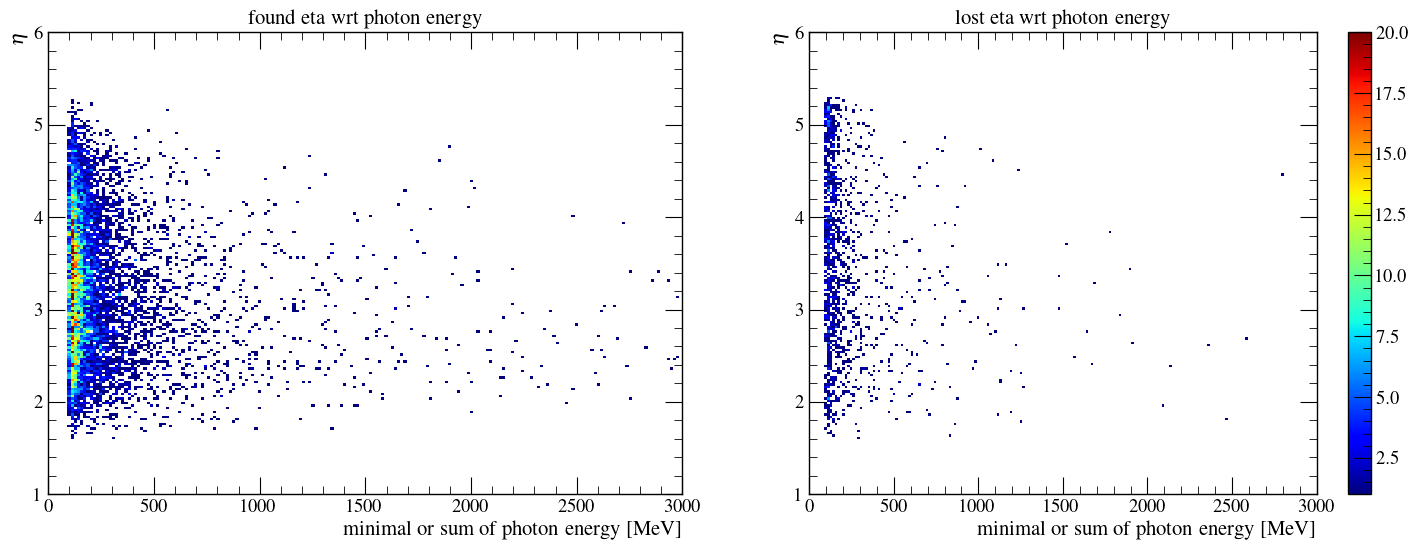

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

a0=ax[0].hist2d(energy_found, eta_found, bins=200, cmap=plt.cm.jet, cmin=1, range=[[0,3e3],[1,6]], vmax=20)
ax[0].set_xlabel("minimal or sum of photon energy [MeV]")
ax[0].set_ylabel(r"$\eta$")
ax[0].set_title("found eta wrt photon energy")

a1=ax[1].hist2d(energy_lost, eta_lost, bins=200, cmap=plt.cm.jet, cmin=1, range=[[0,3e3],[1,6]], vmax=20)
ax[1].set_xlabel("minimal or sum of photon energy [MeV]")
ax[1].set_ylabel(r"$\eta$")
ax[1].set_title("lost eta wrt photon energy")

"""
lost: perhaps slightly more hits at larger eta but not really significant
"""

fig.colorbar(a0[3],ax=ax[1])
plt.show()

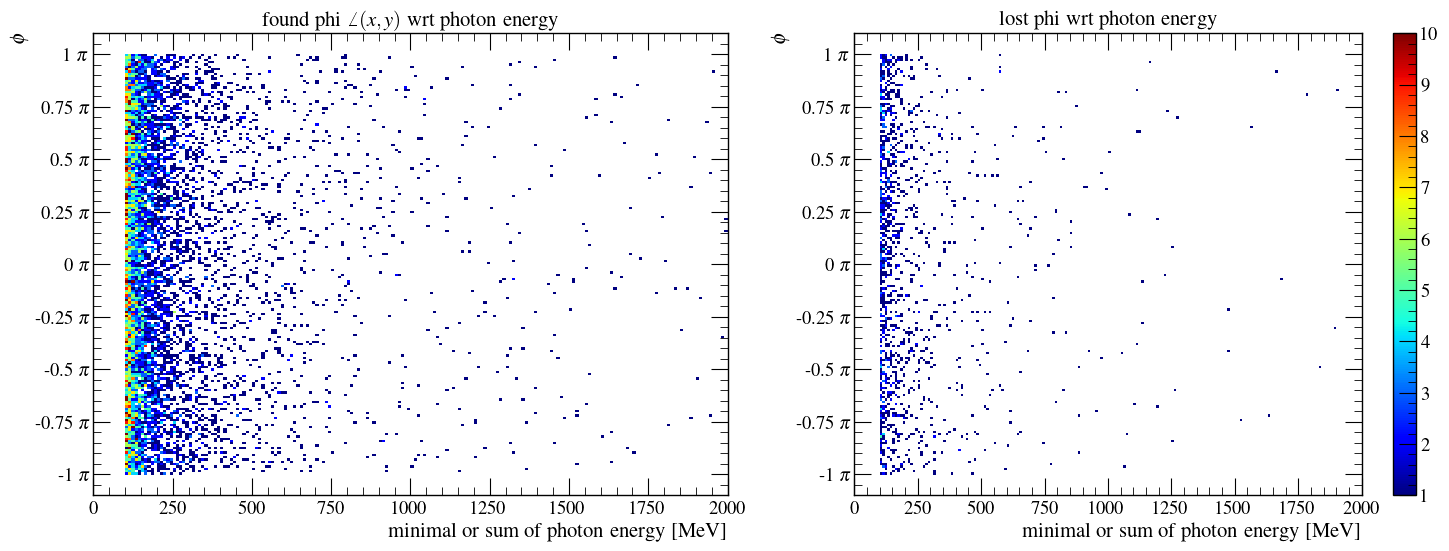

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

a0=ax[0].hist2d(energy_found, phi_found/np.pi, bins=200, cmap=plt.cm.jet, cmin=1, range=[[0,2e3],[-1.1,1.1]],vmax=10)
#ax[0].set_yticks(np.arange(-1,1.1,0.25), minor=True)
ax[0].yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax[0].set_xlabel("minimal or sum of photon energy [MeV]")
ax[0].set_ylabel(r"$\phi$")
ax[0].set_title(r"found phi $\angle(x,y)$ wrt photon energy")

a1=ax[1].hist2d(energy_lost, phi_lost/np.pi, bins=200, cmap=plt.cm.jet, cmin=1, range=[[0,2e3],[-1.1,1.1]], vmax=10)
#ax[1].set_yticks(np.arange(-1,1.1,0.5), minor=True)
ax[1].yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax[1].set_xlabel("minimal or sum of photon energy [MeV]")
ax[1].set_ylabel(r"$\phi$")
ax[1].set_title("lost phi wrt photon energy")

"""
Cannot really make out any patterns that might explain lost and found differences.
See no materialpeak
"""

fig.colorbar(a0[3],ax=ax[1])
#plt.style.use("ggplot")
plt.show()